###Importing the necessary libraries

In [ ]:
import matplotlib
matplotlib.use("Agg")

from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.applications import ResNet152V2
from keras.layers.core import Dropout
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import Input
from keras.models import Model
from keras.optimizers import SGD
from keras.optimizers import Adam
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys, numpy
import os
from keras import optimizers, regularizers
from keras.layers import Dropout, Flatten, Dense, Activation, Input
from keras import callbacks, regularizers
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.engine import  Model
from keras.layers import Conv2D, GlobalAveragePooling2D
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.applications import InceptionResNetV2
import sys, numpy
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers, regularizers
from keras.models import Sequential
from keras.models import load_model
import matplotlib.pyplot as plt 
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.engine import  Model
from keras.layers import Conv2D, GlobalAveragePooling2D
from sklearn import metrics
import itertools
import tensorflow as tf

from google.colab import files
import datetime, os
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


###Unzipping the files

In [ ]:
!unzip '/content/drive/My Drive/pcen_wav_train_val.zip'

Archive:  /content/drive/My Drive/pcen_wav_train_val.zip
   creating: content/
   creating: content/Round2_OS_07_05/
   creating: content/Round2_OS_07_05/train/
   creating: content/Round2_OS_07_05/train/nocalls/
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod333219_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod333201_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod260_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod2305_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod333427_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod2250_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod2135_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod333116_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls_pod2202_0000.png  
  inflating: content/Round2_OS_07_05/train/nocalls/neg_calls

In [ ]:
!unzip '/content/drive/My Drive/pcen_and_wavelet_test.zip'

Archive:  /content/drive/My Drive/pcen_and_wavelet_test.zip
   creating: content/Round2_OS_07_05/test/
   creating: content/Round2_OS_07_05/test/nocalls/
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg21_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg46_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg33_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg42_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg88_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg26_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg12_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg54_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg82_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg7_0000.png  
  inflating: content/Round2_OS_07_05/test/nocalls/calls_pod3_neg6_0

#CNN model

###Give directory paths as well as other parameters

In [ ]:
import os

train_data_path = '/content/content/Round2_OS_07_05/train/'
validation_data_path='/content/content/Round2_OS_07_05/validation/'
test_data_path = '/content/content/Round2_OS_07_05/test/'

#Parametres
img_width, img_height = 607, 617

nb_train_samples = sum(len(files) for _, _, files in os.walk(train_data_path))
print(nb_train_samples)
epochs = 100
batch_size = 157



1394


###Model 

In [ ]:
%load_ext tensorboard

In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


model = Sequential()
model.add(Conv2D(64, (5, 5), padding = 'same', strides=3, input_shape=input_shape))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Conv2D(64, (5, 5), strides=3, padding = 'same'))
model.add(Activation('relu'))

model.add(Conv2D(128, (5, 5),  strides=3, padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.6))

model.add(Conv2D(128, (5, 5), strides=3, padding = 'same'))
model.add(Activation('relu'))
model.add(Dropout(0.6))


model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=3e-5),
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 203, 206, 64)      4864      
_________________________________________________________________
activation_7 (Activation)    (None, 203, 206, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 203, 206, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 68, 69, 64)        102464    
_________________________________________________________________
activation_8 (Activation)    (None, 68, 69, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 23, 23, 128)       204928    
_________________________________________________________________
activation_9 (Activation)    (None, 23, 23, 128)      

In [ ]:
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='checkpointsrkw-{epoch:02d}-{val_loss:.2f}.h5', monitor='val_loss', verbose=0, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                              patience=20, min_lr=1e-8)
train_datagen = ImageDataGenerator(rescale=1. / 255)
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_batchsize = 157
train_generator = train_datagen.flow_from_directory(
    train_data_path,
    target_size=(img_width, img_height),
    batch_size=train_batchsize,
    class_mode='binary',
shuffle=True)
val_batchsize = 256


validation_generator = test_datagen.flow_from_directory(
    validation_data_path,
    target_size=(img_width, img_height),
    batch_size=val_batchsize,
    class_mode='binary',
shuffle=False)

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    validation_data=validation_generator,
    validation_steps=176 // batch_size,
    epochs=550,
    callbacks=[checkpoint]
    )

model.save('srkw.h5')

Found 1394 images belonging to 2 classes.
Found 176 images belonging to 2 classes.
Epoch 1/550
8/8 [==============================] - 17s 2s/step - loss: 0.6944 - accuracy: 0.4928 - val_loss: 0.6933 - val_accuracy: 0.4886
Epoch 2/550
8/8 [==============================] - 15s 2s/step - loss: 0.6938 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4489
Epoch 3/550
8/8 [==============================] - 16s 2s/step - loss: 0.6960 - accuracy: 0.4584 - val_loss: 0.6932 - val_accuracy: 0.4716
Epoch 4/550
8/8 [==============================] - 15s 2s/step - loss: 0.6937 - accuracy: 0.4931 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/550
8/8 [==============================] - 16s 2s/step - loss: 0.6931 - accuracy: 0.5064 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/550
8/8 [==============================] - 16s 2s/step - loss: 0.6936 - accuracy: 0.5099 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/550
8/8 [==============================] - 16s 2s/step - loss: 0.6947 - acc

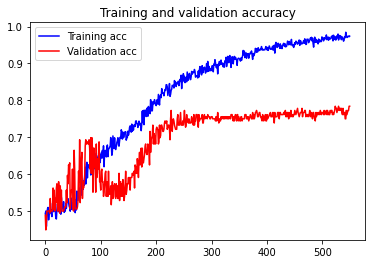

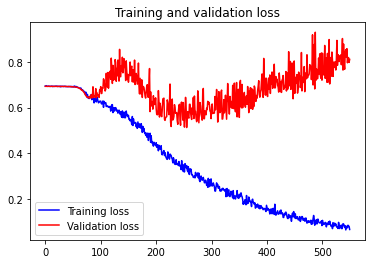

In [ ]:
# loss and accuracy curves.
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np


test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    test_data_path,
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = numpy.math.ceil(test_data_generator.samples / test_data_generator.batch_size)


predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
predictions[predictions<=0.5] = 0
predictions[predictions>0.5] = 1

predicted_classes = (predictions).astype(np.int)

true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())   

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

cm = confusion_matrix(true_classes, predicted_classes)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

Found 201 images belonging to 2 classes.
              precision    recall  f1-score   support

       calls       0.84      0.82      0.83       101
     nocalls       0.82      0.84      0.83       100

    accuracy                           0.83       201
   macro avg       0.83      0.83      0.83       201
weighted avg       0.83      0.83      0.83       201

[[83 18]
 [16 84]]
acc: 0.8308
sensitivity: 0.8218
specificity: 0.8400


#Using Keras Tuner, trying to find the Best model

In [ ]:
!pip install keras-tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
print(tf.__version__)

2.3.0-dev20200615


In [ ]:
import cv2

In [ ]:
img=cv2.imread('/content/content/Round2_OS_07_05/train/calls/calls100_0000.png')
img.shape

(607, 617, 3)

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(607,617,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax'),
        keras.layers.Dense(2, activation='softmax')

  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-4])),
              loss='binary_crossentropy',
              metrics=['accuracy'])
  
  return model

In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="SRKW")

INFO:tensorflow:Reloading Oracle from existing project output/SRKW/oracle.json


In [ ]:
tuner_search.search(epochs=3,validation_split=0.1)